In [96]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [97]:
TEST_DATA_LIMIT=45
dataDict={}

#assumption:height will always be in decreasing order
def fetch(curr_file):
    main_lst=[]
    curr=open(curr_file)
    for iterations in range(0,7):
        curr.readline()
    line =curr.readline()
    while line:
        temp_lst=line.split()
        curr_lst=[]
        for values in temp_lst:
            curr_lst.append(float(values))
        if len(line)>0:
            if line.find("999")==-1:
                    main_lst.append(curr_lst)
        line=curr.readline()
    return main_lst

def find_smaller(value,tmain_lst):
    main_lst=sorted(tmain_lst,key=lambda value:value[1])
    index =-1
    lst_len=len(main_lst)
    while bool(index+1<lst_len) and bool(value>main_lst[index+1][1]):
        index=index+1
    return (index,main_lst)        

def find_bigger(value,tmain_lst):
    main_lst=sorted(tmain_lst,key=lambda value:value[1])
    lst_len=len(main_lst)
    index=lst_len
    while bool(index-1>=0) and bool(value<main_lst[index-1][1]):
        index=index-1
    if index==lst_len:
        return -1
    return (index,main_lst)

def interpolate(index1,index2,main_lst,h0):
    result_lst=[]
    h1=main_lst[index1][1]
    h2=main_lst[index2][1]
    multiplier=float(h0-h1)/float(h2-h1)
    for index in range(0,len(main_lst[0])):
        tc=float(main_lst[index1][index]+multiplier*float(main_lst[index2][index]-main_lst[index1][index]))
        result_lst.append(float(main_lst[index1][index]+multiplier*float(main_lst[index2][index]-main_lst[index1][index])))
    return result_lst    

def formatData(main_lst):
    if len(main_lst)<2:
        raise ValueError("Len of main_Lst is less than 2")
    result_lst=[]
    height=500
    while height<=4900:
        (index1,main_lst)=find_smaller(height,main_lst)
        (index2,main_lst)=find_bigger(height,main_lst)
        curr_lst=[]
        if(index1!=index2):
            if index1==-1:
                index1=index2
                index2,main_lst=find_bigger(main_lst[index2][1]+1,main_lst)
            if index2==-1:
                index2=index1
                index1,main_lst=find_smaller(main_lst[index1][1]-1,main_lst)
            curr_lst=interpolate(index1,index2,main_lst,height)
        else:#height exist in main_lst
            curr_lst=main_lst[index1]
        result_lst.append(curr_lst)
        main_lst.append(curr_lst)
        height+=100
    return result_lst

def getDateFromFileName(fileName):
    date = fileName[12:20]
    year = date[:4]
    month  = date[4:6]
    day = date[6:8]
    date = year+"-"+month+"-"+day
    return date

def getCityFromFileName(fileName):
    measurementCityNames = {76:"Payern", 77:"Muenchen",78:"Stuttgart",79:"Trappes", 80:"Milano"}
    cityCode = fileName[4:6]
    cityName = measurementCityNames[int(cityCode)]
    return cityName

    

In [98]:
lst=os.listdir('./weatherData/')
lst.sort()
dataDict = {}
for curr_file in lst:
    if("1200" in curr_file): #only taking data of 00:00
        continue
    
    date = getDateFromFileName(curr_file)
    city = getCityFromFileName(curr_file)
    
    try:
        lst_lst=fetch('./weatherData/'+curr_file)
        if(len(lst_lst)>0):
            temp_lst=formatData(lst_lst)[:TEST_DATA_LIMIT]
            dataDict[date] = dataDict.get(date,{})
            dataDict[date][city] = temp_lst #sorted(temp_lst,key=lambda val:val[1])
    except Exception as e:
        print(e)
        print("invalid file"+curr_file)

could not convert string to float: '<!--<![endif]-->'
invalid fileVSST76.LSSW_20170928_0000.txt
could not convert string to float: '<!--<![endif]-->'
invalid fileVSST77.LSSW_20170928_0000.txt
Len of main_Lst is less than 2
invalid fileVSST78.LSSW_20170331_0000.txt
could not convert string to float: '<!--<![endif]-->'
invalid fileVSST79.LSSW_20170928_0000.txt
could not convert string to float: '<!--<![endif]-->'
invalid fileVSST80.LSSW_20170928_0000.txt


In [99]:
#deleting days for which data is not available
dataDict = {key: dataDict[key] for key in list(dataDict) if(len(dataDict[key])==5)}

In [100]:
len(dataDict)

238

2017-08-17 Milano


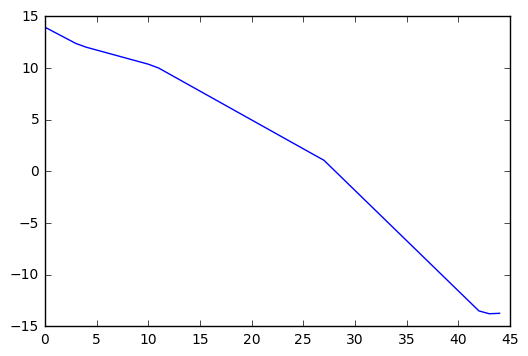

2017-03-17 Milano


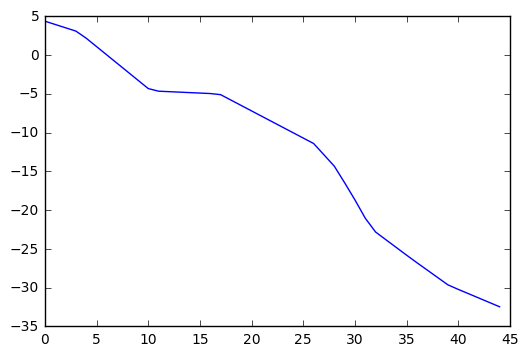

2017-10-09 Milano


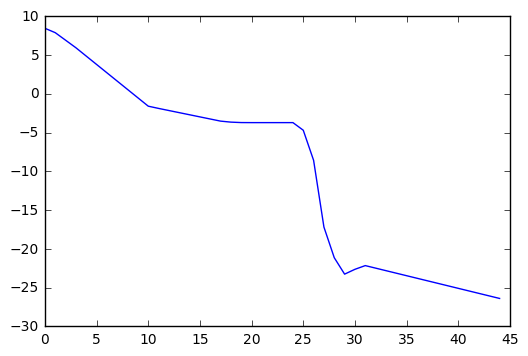

2017-05-31 Milano


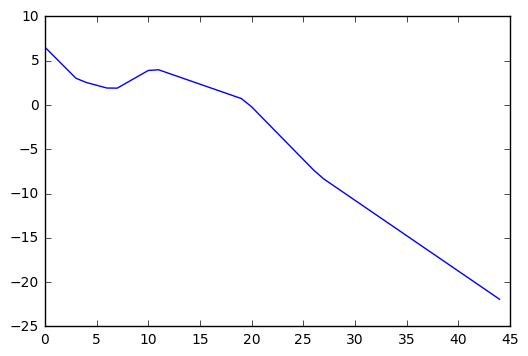

2017-06-30 Milano


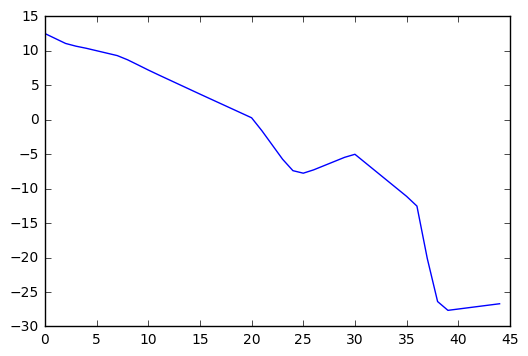

2017-03-29 Milano


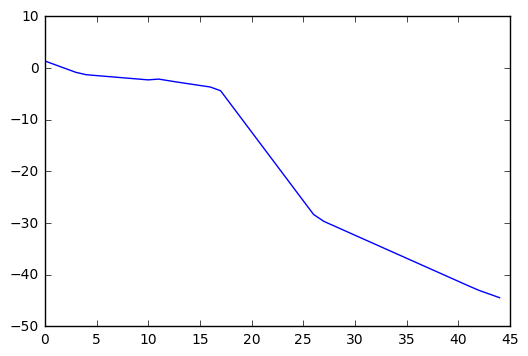

2017-04-27 Milano


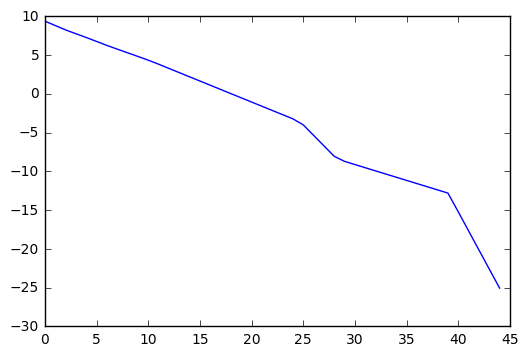

2017-07-09 Milano


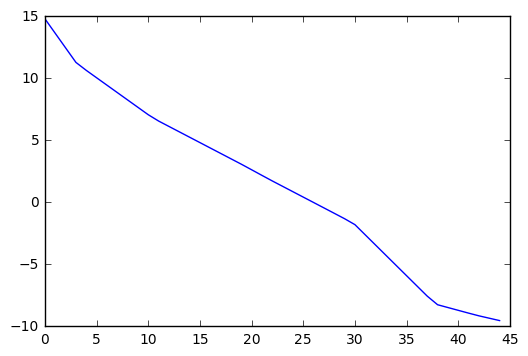

2017-08-10 Milano


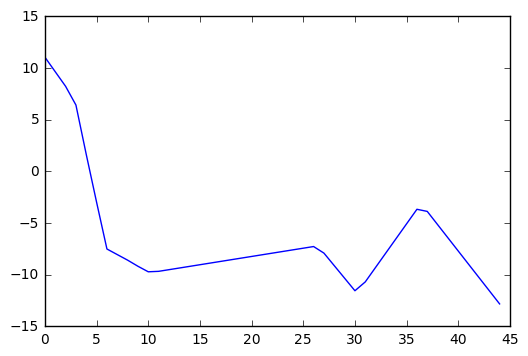

2017-09-27 Milano


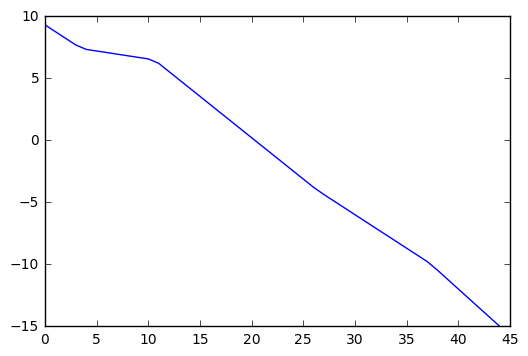

2017-05-24 Milano


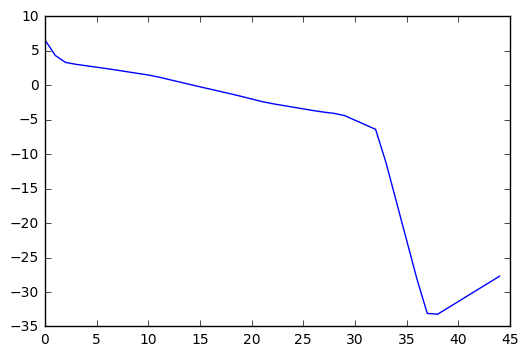

2017-07-22 Milano


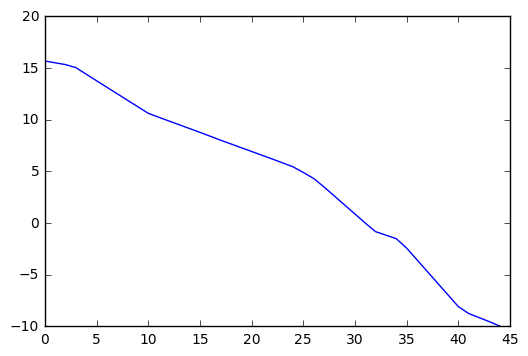

2017-07-06 Milano


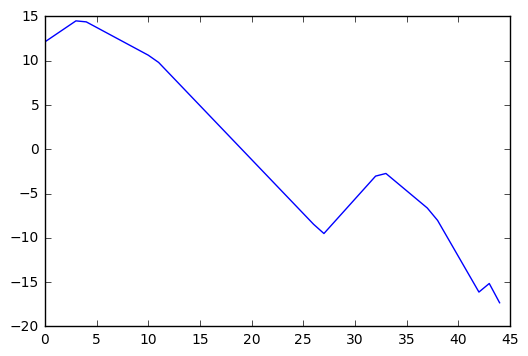

2017-04-22 Milano


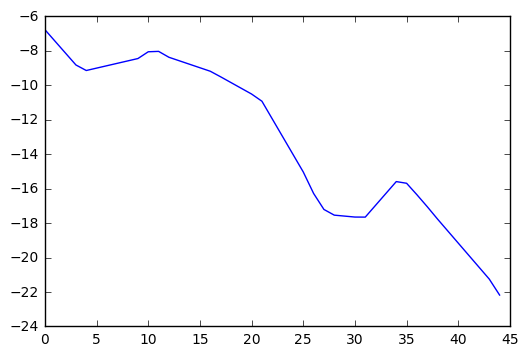

2017-08-29 Milano


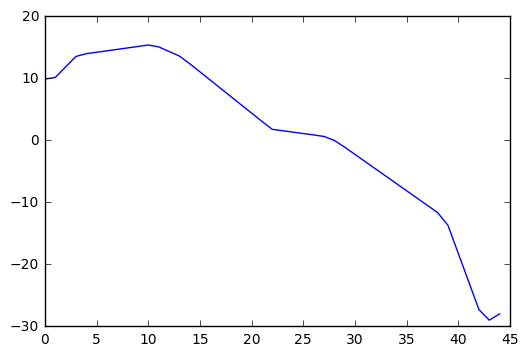

2017-10-16 Milano


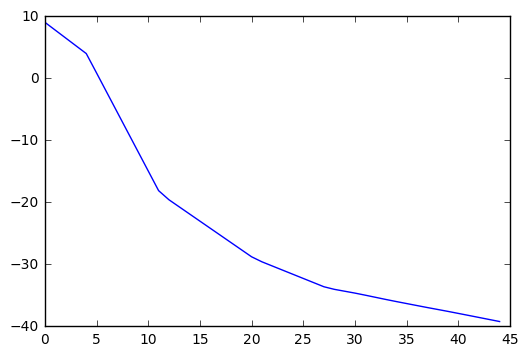

2017-05-01 Milano


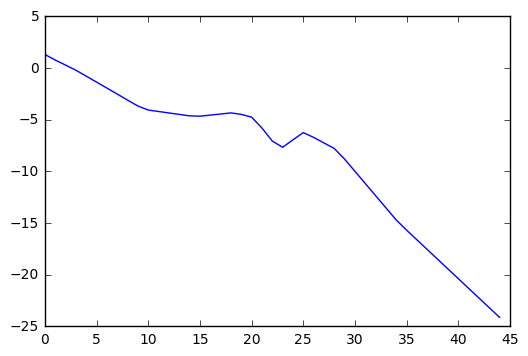

2017-06-20 Milano


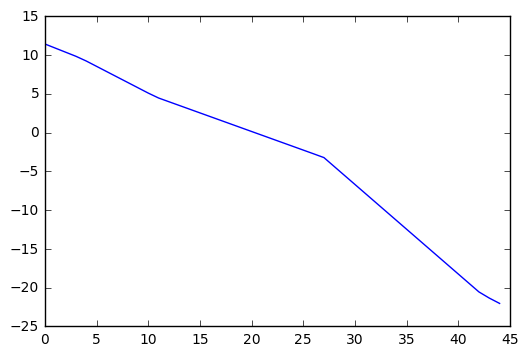

2017-08-04 Milano


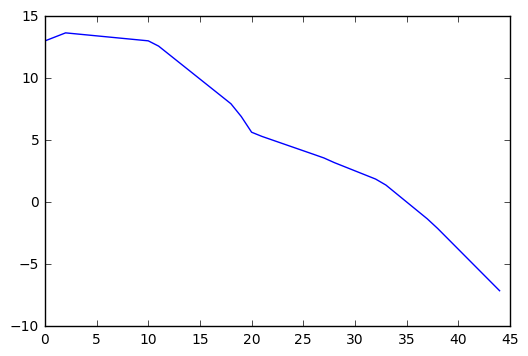

2017-12-04 Milano


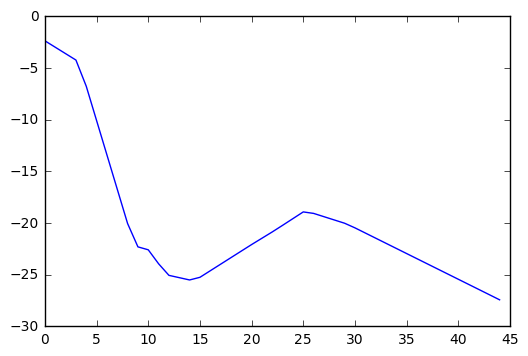

2017-09-14 Milano


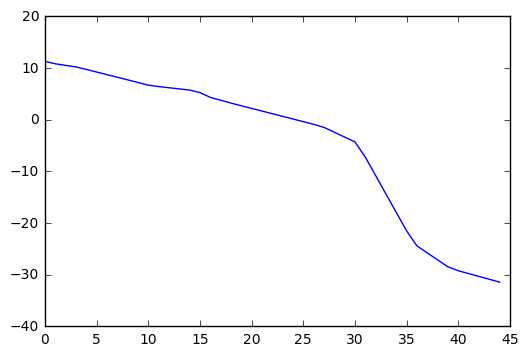

2017-04-13 Milano


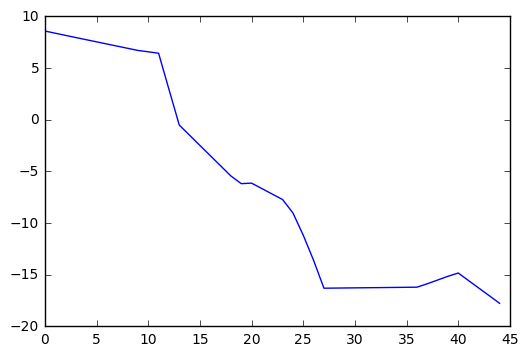

2017-03-18 Milano


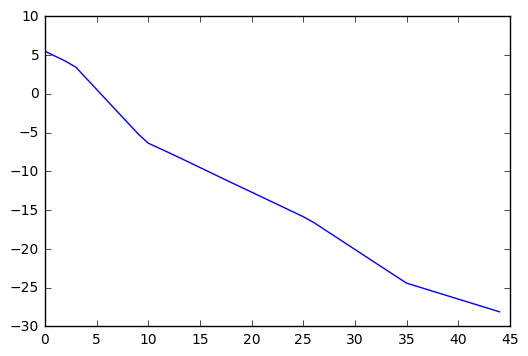

2017-03-26 Milano


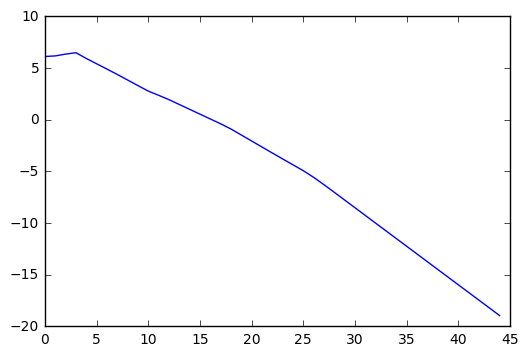

In [101]:
params = [" Pressure"," Height ", " Temperature", " Dew Point" , " Wind Direction", " Wind Speed"]
newDict = {}
maxplot = 25
count = 0
for date in list(dataDict):
    values = dataDict[date]
    newDict[date] = newDict.get(date,{})
    for city in list(values):
        for lstItem in values[city]:
            for i,param in enumerate(lstItem):
                newDict[date][city + params[i]] = newDict[date].get(city+params[i],[])
                newDict[date][city + params[i]].append(param)        
        
    count += 1
    if(count<maxplot):
        lst = newDict[date][city+params[3]] #plotting wind speed
        print(date , city)
        plt.plot(lst) #plot one parameter vs other for a particular date and city
        plt.show()
    
                
            
        
        
        
    

In [102]:
#saving weather data as python dictionary
import pickle
with open('weather_data.p', 'wb') as fp:
    pickle.dump(newDict, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [103]:
weatherData = newDict

In [104]:
weatherDates = list(weatherData)
#sorted weatherDates to take data from weatherData dictionary in sorted form
weatherDates.sort()
lst_weather = [] #all parameters datewise 45*5*5 for each date 5 type of parameters for 5 cities for 45 heights
#sorting
params = list(weatherData[weatherDates[0]])
params.sort()
#removing height as parameter as same for all
params = [param for param in params if "Height" not in param]
params = [param for param in params if "Pressure" not in param]
params = [param for param in params if "Direction" not in param]

In [105]:
params

['Milano Dew Point',
 'Milano Temperature',
 'Milano Wind Speed',
 'Muenchen Dew Point',
 'Muenchen Temperature',
 'Muenchen Wind Speed',
 'Payern Dew Point',
 'Payern Temperature',
 'Payern Wind Speed',
 'Stuttgart Dew Point',
 'Stuttgart Temperature',
 'Stuttgart Wind Speed',
 'Trappes Dew Point',
 'Trappes Temperature',
 'Trappes Wind Speed']

In [106]:
#making dataframe for weatherData sorted by date 
#making column list for weather dataframe (for example milano temp 1 .... milano temperature 45 )
col_list = ["Date"] #date is also a column
for param in params:
    for i in range(1,46):
        col_list.append(param+" "+str(i))

#putting weather data in list of list to put in dataframe
data_lst = []
for date in weatherDates:
    date_data = []
    date_data.append(date) #first column is date for dataframe
    data = weatherData[date]
    for param in params:
        points = data[param] #data[param] is a list of 45 value points for param parameter
        for val in points: 
            date_data.append(val)
            
    data_lst.append(date_data)
        

In [107]:
weather_df = pd.DataFrame(data_lst, columns = col_list)

In [108]:
weather_df.shape

(238, 676)

In [109]:
#saving dataframe as pickle
import pickle
with open('weather_DataFrame.p', 'wb') as fp:
    pickle.dump(weather_df, fp, protocol=pickle.HIGHEST_PROTOCOL)